
# step 1_1: reading data

In [ ]:
import pandas as pd

In [6]:
input_data0=pd.read_csv('bikeshare.csv')

# step 1_2:Cleaning data

In [7]:
input_data = input_data0.drop(['dteday'], axis=1)

In [8]:
input_data.head()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# step 1_3:Saved cleaned data

In [9]:

input_data.to_csv('cleaned_bikeshare.csv')


In [10]:
input_data=pd.read_csv('cleaned_bikeshare.csv')

In [11]:
input_data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# step 2: Features selection

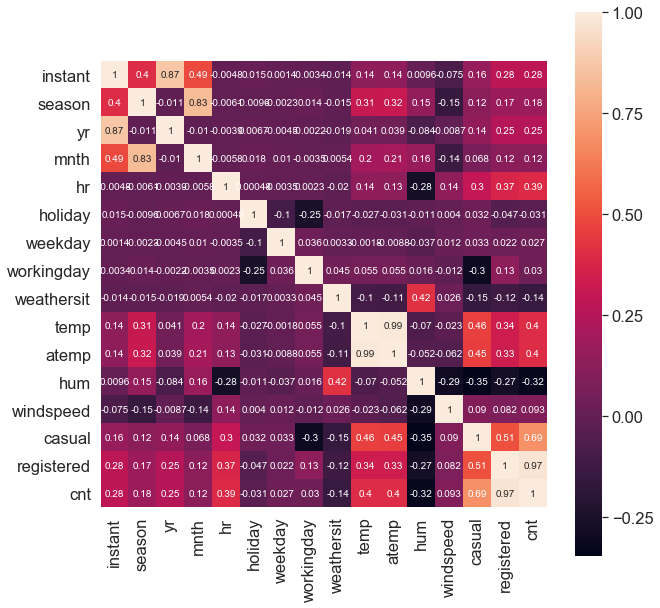

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(input_data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()


In [19]:
selected_input_data = input_data[['registered','casual','atemp','cnt']]

In [20]:
selected_input_data.head()


,registered,casual,atemp,cnt
0,13,3,0.2879,16
1,32,8,0.2727,40
2,27,5,0.2727,32
3,10,3,0.2879,13
4,1,0,0.2879,1


# Step 3: Split data to train and test

In [21]:
 from sklearn.model_selection import train_test_split
selected_input_data_train, selected_input_data_test= train_test_split(selected_input_data, test_size=0.20, random_state=31)

In [22]:
selected_input_data_train.head()


,registered,casual,atemp,cnt
2953,89,30,0.4848,119
9851,163,45,0.2273,208
8518,69,28,0.3333,97
8580,104,2,0.2121,106
16004,371,122,0.4091,493


In [23]:
selected_input_data_test.head()

,registered,casual,atemp,cnt
9097,55,1,0.2273,56
11871,178,11,0.5455,189
2546,33,11,0.5303,44
6198,212,41,0.5303,253
1397,65,7,0.2273,72


# Step 3_1: Split train and test data to features and outcome

In [29]:
selected_input_data_train_features =selected_input_data_train.drop(['cnt'], axis=1)
selected_input_data_train_features.head()
selected_input_data_train_output = selected_input_data_train['cnt']
selected_input_data_train_output.head()

,registered,casual,atemp
2953,89,30,0.4848
9851,163,45,0.2273
8518,69,28,0.3333
8580,104,2,0.2121
16004,371,122,0.4091


In [33]:
selected_input_data_test_features =selected_input_data_test.drop(['cnt'], axis=1)
selected_input_data_test_features.head()
selected_input_data_test_output = selected_input_data_test['cnt']
selected_input_data_test_output.head()

9097      56
11871    189
2546      44
6198     253
1397      72
Name: cnt, dtype: int64

# Step 4: Define a model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
My_model = LinearRegression()

# Step 5: Train the model

In [36]:
My_model.fit(selected_input_data_train_features,selected_input_data_train_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Step 6: Do the prediction on test data

In [37]:
y_pred = My_model.predict(selected_input_data_test_features)

In [38]:
y_pred

array([ 56., 189.,  44., ...,  92., 285., 162.])

# Step 7: Measure the accuracy

In [39]:
from sklearn.metrics import mean_squared_error
print ('mean_squared_error= ', mean_squared_error(selected_input_data_test_output,y_pred))

mean_squared_error=  1.2359287089521709e-25


In [40]:
from sklearn.metrics import r2_score
print ('r2_score= ', r2_score(selected_input_data_test_output,y_pred))

r2_score=  1.0
